In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving netflix.csv to netflix.csv


In [5]:
df = next(iter(uploaded))

In [6]:
file_content = uploaded[df]

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

In [8]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(file_content))

In [11]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Upon initial examination of the dataset, it is observed that it consists of more than 8807 rows and 12 columns. A preliminary overview indicates that the dataset predominantly represents movies and TV shows, with a notable absence of ratings for some entries. Additionally, NaN values are present in certain columns, suggesting missing or incomplete data.

Comments on the range of attributes Show_id: A unique identifier assigned to each movie or TV show in the dataset. Type: Identifies whether the entry is a movie or a TV show. Title: The title or name of the movie or TV show. Director: The director(s) associated with the movie. Cast: The actors or individuals involved in the movie or TV show. Country: The country where the movie or TV show was produced. Date_added: The date when the movie or TV show was added to Netflix. Release_year: The actual year when the movie or TV show was released. Rating: The TV rating assigned to the movie or TV show. Duration: The total duration of the movie in minutes or the number of seasons for TV shows. Listed_in: The genre or categories in which the movie or TV show is listed. Description: A summary or brief description of the movie or TV show.

In [12]:
# Display a concise summary of a DataFrame's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
# Determine the dimensions of a DataFrame (R,C)
df.shape

(8807, 12)

In [14]:
#Descriptive statistics for numerical columns
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [15]:
#  Summary of descriptive statistics for columns with object data type
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [16]:
# summary of descriptive statistics for all columns including both numerical and non-numerical (object) columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Calculate the number of missing values 
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [18]:
#Calculates the percentage of missing values in each colum
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [19]:
# Count the occurrences of unique values in a specific column
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [20]:
# Calculate the percentage distribution of unique values in a specific column
df['type'].value_counts(normalize=True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

<Axes: ylabel='type'>

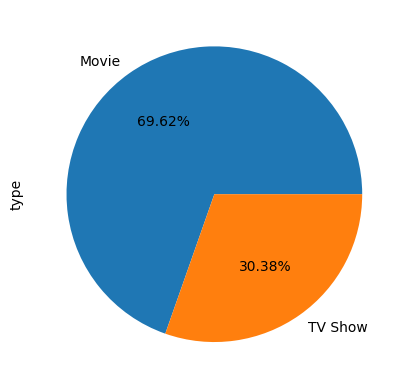

In [21]:
# Created a pie chart visualization of the value counts for unique values in the 'type' column 
df['type'].value_counts().plot(
    kind='pie',autopct='%.2f%%')

Based on the provided chart, it is evident that the majority of the audience, accounting for 69.62%, prefers movies compared to TV shows.

In [22]:
# groups the DataFrame by the "rating" column and then calculated the count of each unique rating.
Rating = df.groupby("rating").rating.count().sort_values(ascending=False)
Rating

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [23]:
fig = px.histogram(df, y='rating', color='type')
fig.update_yaxes(showgrid=False, categoryorder='total ascending', 
                 ticksuffix=' ', showline=False)
fig.show()

The audience prefers TV-MA and TV-14 shows more and the least preferred rating shows are Nc-17. Most of the content watched by the audience is for a mature audience. The second largest type of rating watched by the audience is TV-14 which is inappropriate for children younger than age 14. The conclusion is drawn here is most of the audience is of mature age.

chart for comparison between TV Shows and Movies. This chart tells us that Netflix’s audience prefers to watch movies rather than TV Shows. The Highest rating is given to Movies and TV Show having a TV-MA

In [24]:
# calculated the movie released in each year
movie_count = df[df["type"]=="Movie"]
movie_release = movie_count.groupby("release_year").size()
movie_release.tail()

release_year
2017    767
2018    767
2019    633
2020    517
2021    277
dtype: int64

In [25]:
# calculated the TV Show released in each year
show_count = df[df["type"]=="TV Show"]
show_release = show_count.groupby("release_year").size()
show_release.tail()

release_year
2017    265
2018    380
2019    397
2020    436
2021    315
dtype: int64

<Axes: xlabel='release_year', ylabel='Count'>

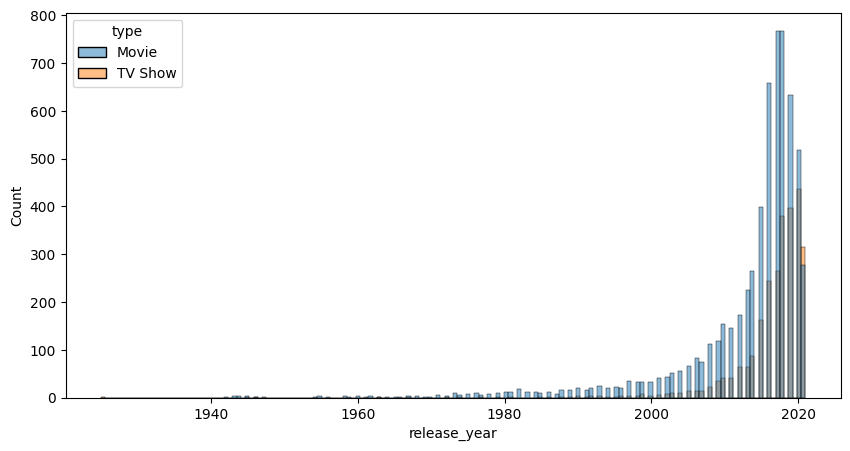

In [26]:
# Histplot
plt.figure(figsize=(10,5))
sns.histplot(x='release_year',hue='type',data=df)

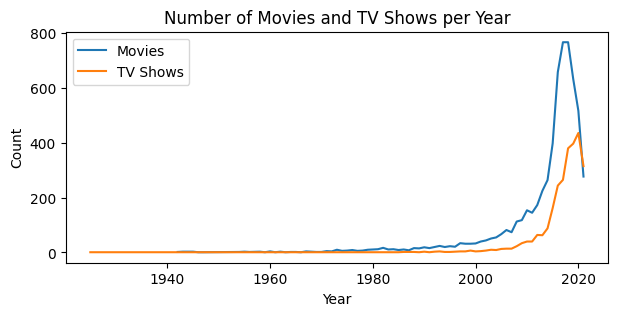

In [27]:
# line plot
df_movie = df[df["type"] == "Movie"]
movie_by_year=df_movie.groupby("release_year").size()
df_tvshow = df[df["type"] == "TV Show"]
tvshow_by_year=df_tvshow.groupby("release_year").size()
plt.figure(figsize=(7,3))
plt.plot(movie_by_year.index, movie_by_year.values, label='Movies')
plt.plot(tvshow_by_year.index, tvshow_by_year.values, label='TV Shows')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Movies and TV Shows per Year')
plt.legend()
plt.show()

As shown, 2020 was a high water mark with the greatest number of shows 436 released that year. The steep decline from 2020 could be due to the fact that competitors began introducing their own streamong services. For instance, all Four Marvel shows were not continued with Netflix, with the rights reverting to Marvel/Disney. same shows for Movies aswell 2017-2018 was a high water mark with the greatest number of shows 767 released that year, but after 2018 there is a decline.

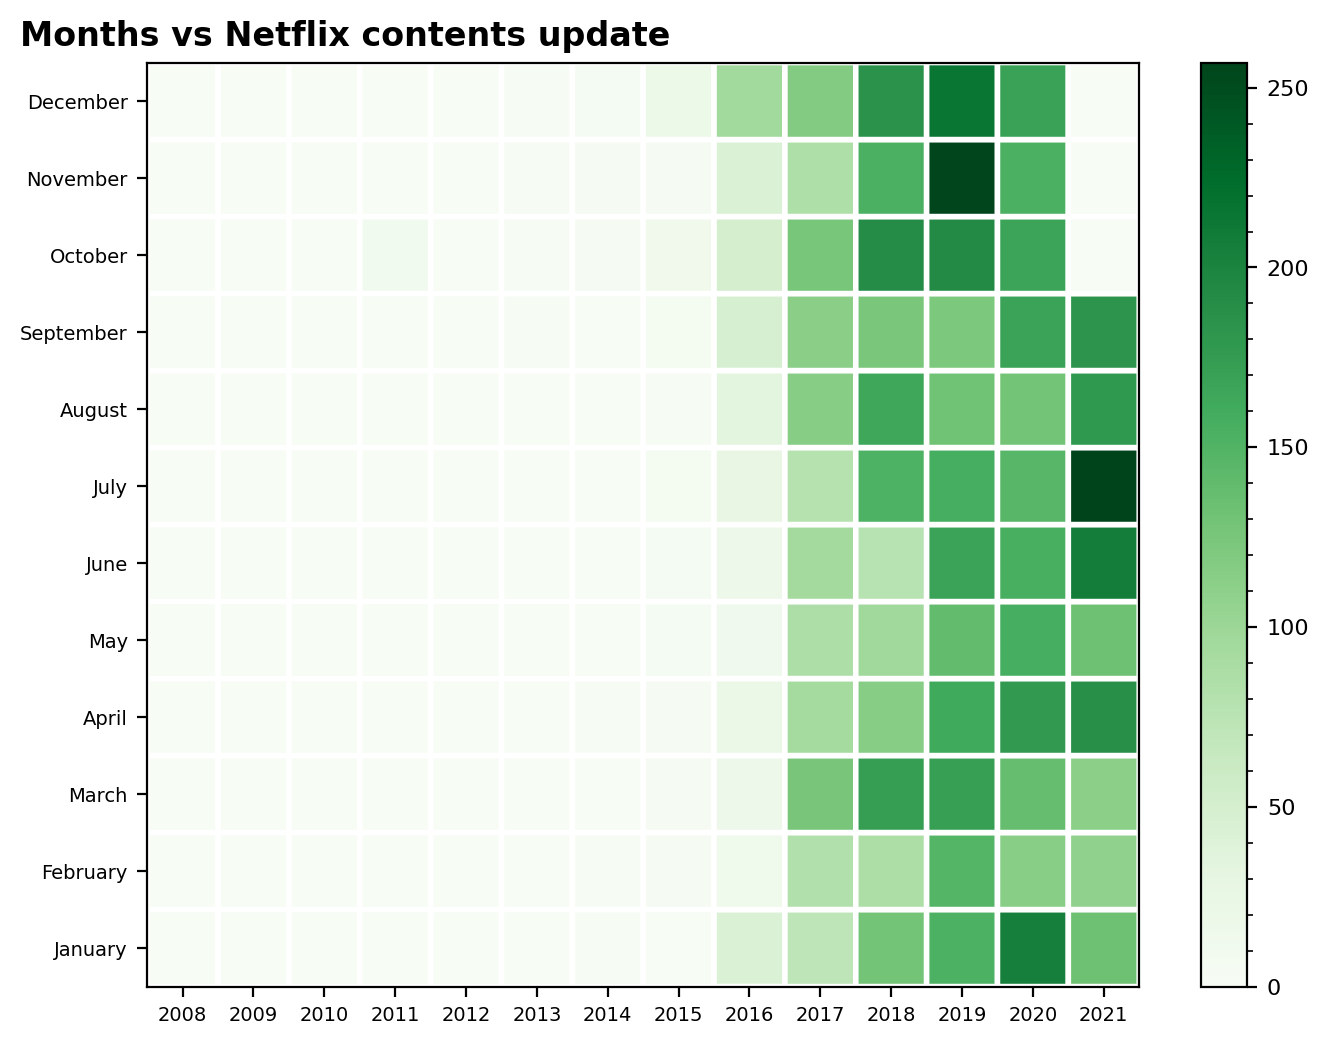

In [29]:
# Heatmap
netflix_date = df[['date_added']].dropna()
netflix_date['year']= netflix_date['date_added'].apply(lambda x:x.split(', ')[-1])
netflix_date['month']= netflix_date['date_added'].apply(lambda x:x.lstrip().split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
new_df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(8,6), dpi=200)
plt.pcolor(new_df, cmap ='Greens',edgecolors='white',linewidths=2)
plt.xticks(np.arange(0.5, len(new_df.columns),1), new_df.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(new_df.index),1), new_df.index, fontsize=7)

plt.title('Months vs Netflix contents update', fontsize=12,fontweight='bold', position=(0.20,1.0+0.02))
cbar=plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

If a producer wants to release a show which month is the best month to release it.

The best month to release content so the producer can gain much revenue. Most of the holidays came in December month so to releases a Movie or TV show in December is the best way to earn a lot of profit as the whole family will be spending time with each other and watching shows.

In [30]:
df.country.value_counts().head(10) # top 10 countries

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [31]:
# TOP 10 countries on Netflix
top_10_countries = df['country'].value_counts().head(10)
df_top_10 = df[df['country'].isin(top_10_countries.index)]

fig = px.histogram(df_top_10, y='country', color='type')
fig.update_yaxes(showgrid=False, categoryorder='total ascending', 
                 ticksuffix=' ', showline=False)
fig.update_layout(
    title={
        'text': 'Top 10 Countries - Country Distribution',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
fig.show()

In the given chart, Upon closer examination, it is evident that the USA has the highest number of movies. Following closely is India, which holds the second position. However, when considering TV shows, the United Kingdom (UK) takes the second position after the USA, with a significant representation.

In [33]:
cast_df = df[['type','cast']]
actor = cast_df.set_index('type').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
d3 = actor.reset_index()
d3.rename({0: "Actor"}, axis=1, inplace=True)

In [34]:
d3[d3['type']=='Movie'].Actor.value_counts().head(10)

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Akshay Kumar        30
Om Puri             30
Amitabh Bachchan    28
Julie Tejwani       28
Paresh Rawal        28
Rupa Bhimani        27
Boman Irani         27
Name: Actor, dtype: int64

In [35]:
d3[d3['type']=='TV Show'].Actor.value_counts().head(10)

Takahiro Sakurai      25
Yuki Kaji             19
Daisuke Ono           17
Junichi Suwabe        17
Ai Kayano             17
Yuichi Nakamura       16
Jun Fukuyama          15
Yoshimasa Hosoya      15
David Attenborough    14
Mamoru Miyano         13
Name: Actor, dtype: int64

In [36]:
top_15_cast = d3['Actor'].value_counts().head(15)
df_top_15 = d3[d3['Actor'].isin(top_15_cast.index)]

fig = px.histogram(df_top_15, y='Actor', color='type')
fig.update_yaxes(showgrid=False, categoryorder='total ascending', 
                 ticksuffix=' ', showline=False)
fig.update_layout(
    title={
        'text': 'Top 15 Actors - Actor Distribution',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
fig.show()

Based on the provided plot, it is apparent that Takahiro Sakurai emerges as the leading actor in TV series, securing the topmost position. Following closely behind in the second position is Yuki Kaji. Anupam Kher emerges as the leading actor in Movies, securing the topmost position. Following closely behind in the second position is Shah Rukh Khan

In [37]:
dir_df = df[['type','director']]
actor = dir_df.set_index('type').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
d4 = actor.reset_index()
d4.rename({0: "Director"}, axis=1, inplace=True)

In [38]:
d4[d4['type']=='Movie'].Director.value_counts().head(10)

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           15
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Name: Director, dtype: int64

In [39]:
d4[d4['type']=='TV Show'].Director.value_counts().head(10)

Alastair Fothergill      3
Ken Burns                3
Jung-ah Im               2
Gautham Vasudev Menon    2
Iginio Straffi           2
Hsu Fu-chun              2
Stan Lathan              2
Joe Berlinger            2
Shin Won-ho              2
Lynn Novick              2
Name: Director, dtype: int64

In [40]:
top_20_Dir = d4['Director'].value_counts().head(20)
df_top_20 = d4[d4['Director'].isin(top_20_Dir.index)]

fig = px.histogram(df_top_20, y='Director', color='type')
fig.update_yaxes(showgrid=False, categoryorder='total ascending', 
                 ticksuffix=' ', showline=False)
fig.update_layout(
    title={
        'text': 'Top 20 Directors - Director Distribution',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
fig.show()

Based on the plot, it is apparent that Alastair Fothergill & Ken Burns are the leading diector in TV series, securing the topmost position. Rajiv Chilaka emerges as the leading diector in Movies, securing the topmost position. Following closely behind in the second position is Jan Suter.

In [41]:
gen = df[['type','listed_in']]
Genre = gen.set_index('type').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
d2 = Genre.reset_index()
d2.rename({0: "Genre"}, axis=1, inplace=True)

In [42]:
d2[d2['type']=='Movie'].Genre.value_counts().head(10)

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: Genre, dtype: int64

In [43]:
d2[d2['type']=='TV Show'].Genre.value_counts().head(10)

International TV Shows    1351
TV Dramas                  763
TV Comedies                581
Crime TV Shows             470
Kids' TV                   451
Docuseries                 395
Romantic TV Shows          370
Reality TV                 255
British TV Shows           253
Anime Series               176
Name: Genre, dtype: int64

In [44]:
top_10_genre = d2['Genre'].value_counts().head(10)
df_top_10 = d2[d2['Genre'].isin(top_10_genre.index)]

fig = px.histogram(df_top_10, y='Genre', color='type')

fig.update_yaxes(showgrid=False, categoryorder='total ascending', 
                 ticksuffix=' ', showline=False)

fig.update_layout(
    title={
        'text': 'Top 10 Genres - Genre Distribution',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

Based on the provided plot, it is apparent that International Movies & International TV Shows are the top gener in movie & tv show.

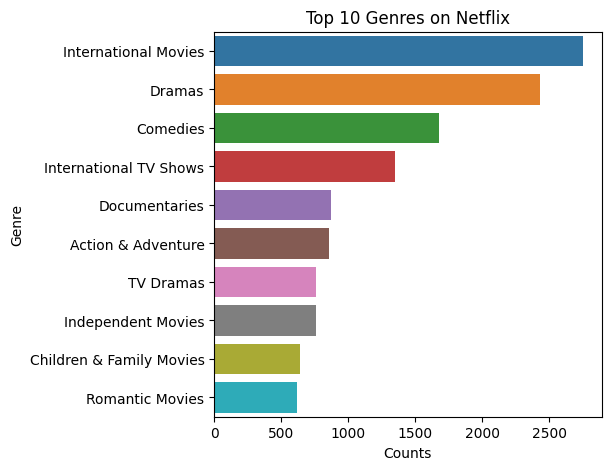

In [45]:
# total genre
Genre = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(5,5))
g = sns.countplot(y = Genre, order=Genre.value_counts().index[:10])
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Counts')
plt.ylabel('Genre')
plt.show()

In [46]:
# droping rows for small percentages of null
df.dropna(subset=['rating','duration'],axis=0,inplace=True)
df.dropna(subset=['date_added'],axis=0,inplace=True)

In [47]:
df.shape

(8790, 12)

In [48]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False) 

director        29.82
country          9.43
cast             9.39
show_id          0.00
type             0.00
title            0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [49]:
#Data Wrangling

df['country']=df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data', inplace=True)
df['director'].replace(np.nan, 'No Data', inplace=True)
df.dropna(inplace=True)
                                             
#drop duplicates
df.drop_duplicates(inplace=True)

In [50]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [51]:
show_df = df.loc[(df['type']=='TV Show')]
show_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [52]:
show_df.duration=show_df.duration.apply(lambda x:x.replace(" Season","")if 'Season' in x else x)
show_df.head(2) # still here 1 data with 's'

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2s,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [53]:
show_df.duration=show_df.duration.apply(lambda x:x.replace("s","")if 's' in x else x)
show_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [54]:
show_df.loc[:,['duration']]=show_df.loc[:,['duration']].apply(lambda x: x.astype('int64'))

In [55]:
show_df.describe()

,release_year,duration
count,2664.000000,2664.000000
mean,2016.627628,1.751877
std,5.735194,1.550622
min,1925.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,1.000000
75%,2020.000000,2.000000
max,2021.000000,17.000000


In [56]:
# Longest tv show
longest_shows=show_df.loc[(show_df['duration']>=17)]
longest_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,No Data,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...


In [57]:
# shorted tv show
longest_shows=show_df.loc[(show_df['duration']==1)]
longest_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",No Data,No Data,United States,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",United States,"September 23, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."


Based on the available data, it has been determined that the shortest TV show in the dataset consists of only 1 season, while the longest TV show spans an impressive 17 seasons.

In [58]:
movie_df = df.loc[(df['type']=='Movie')]
movie_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [59]:
movie_df.duration=movie_df.duration.apply(lambda x:x.replace(" min","")if 'min' in x else x)
movie_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [60]:
movie_df.loc[:,['duration']]=movie_df.loc[:,['duration']].apply(lambda x: x.astype('int64'))

In [61]:
movie_df.describe()

,release_year,duration
count,6126.000000,6126.000000
mean,2013.120144,99.584884
std,9.681723,28.283225
min,1942.000000,3.000000
25%,2012.000000,87.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


In [62]:
# short movie
shortest_movie=movie_df.loc[(movie_df['duration']==np.min(movie_df.duration))]
shortest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",No Data,United States,"June 4, 2019",2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ..."


In [63]:
# Longest movie
longest_movie=movie_df.loc[(movie_df['duration']==np.max(movie_df.duration))]
longest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,No Data,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


After analyzing the provided data, it has been ascertained that the shortest movie in the dataset has a duration of 3 minutes, whereas the longest movie stretches out for an impressive 312 minutes.

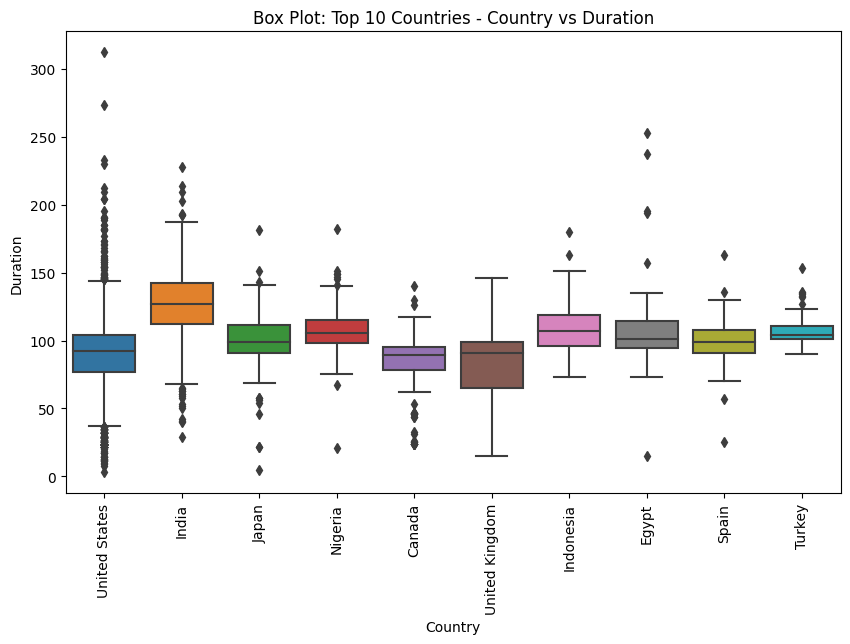

In [64]:
# Boxplot
top_10_countries = movie_df['country'].value_counts().head(10).index

# Filter the data for the top 10 countries

filtered_data = movie_df[movie_df['country'].isin(top_10_countries)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='duration', data=filtered_data)
plt.title('Box Plot: Top 10 Countries - Country vs Duration')
plt.xlabel('Country')
plt.ylabel('Duration')
plt.xticks(rotation=90)

plt.show()

There are several movies from the USA with relatively longer durations compared to other countries. These outliers are represented as individual data points beyond the whiskers of the box plot, indicating extreme values.

In [65]:
df1 = df.copy()
df1["date_added"] = pd.to_datetime(df1['date_added']) # add 2 columns of year and month
df1['year_added'] = df1['date_added'].dt.year
df1['month_added']=df1['date_added'].dt.month

In [66]:
df1.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9


In [67]:
filtered_country = df1[df1.country != 'No Data'].set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
country_df = filtered_country.reset_index()
country_df.rename({0:"Country"},axis=1,inplace=True)

In [68]:
filtered_genre = df1.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genre_df = filtered_genre.reset_index()
genre_df.rename({0:"genre"},axis=1,inplace=True)

In [69]:
df_county=df1.reset_index().merge(country_df, on='title', how='inner')

In [70]:
df_new=df_county.reset_index().merge(genre_df, on='title', how='inner')

In [71]:
df_new.head()

,level_0,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,Country,genre
0,0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,United States,Documentaries
1,1,1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,South Africa,International TV Shows
2,1,1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,South Africa,TV Dramas
3,1,1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,South Africa,TV Mysteries
4,2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,United States,Crime TV Shows


In [72]:
df_new[df_new['Country']=='United States'].head()

,level_0,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,Country,genre
0,0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,United States,Documentaries
4,2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,United States,Crime TV Shows
5,2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,United States,International TV Shows
6,2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,United States,TV Action & Adventure
7,3,3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,United States,Docuseries


In [73]:
top_10_country = df_new['Country'].value_counts().head(10)
df_top_10 = df_new[df_new['Country'].isin(top_10_country.index)]

fig = px.histogram(df_top_10, y='Country', color='genre')
fig.update_yaxes(showgrid=False, categoryorder='total ascending', 
                 ticksuffix=' ', showline=False)
fig.update_layout(
    title={
        'text': 'Top 10 country - Genre Distribution',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
fig.show()

From the provided plot, it is evident that in the United States, the most frequently watched genres are documentaries, dramas, and comedies. On the other hand, in India, the preferred genres include international movies, dramas, and comedies.

Insights:

The most content type on Netflix is movies, The popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been increasing significantly. but after 2018 there is a downfall. The country by the amount of the produces content is the United States. The most popular director in TV series on Netflix , Alastair Fother gill & Ken Burns. & Rajiv Chilaka emerges as the leading director in Movies. International Movies is a genre that is mostly in Netflix, The largest count of Netflix content is made with a 'TV-MA' rating, The most popular actor on Netflix TV Shows based on the TV shows is Takahiro Sakurai, The most popular actor on Netflix movie, based on the Movies, is Anupam Kher. International Movies & International TV Shows are the top genre of movie & tv show. The shortest movie in the dataset has a duration of 3 minutes, whereas the longest movie stretches out for an impressive 312 minutes. The shortest TV show in the dataset consists of only 1 season, while the longest TV show spans an impressive 17 seasons.

Recommendations: Focus on Movie Content: Since movies are the most dominant content type on Netflix, continue to invest in acquiring and producing a diverse range of movies to cater to different viewer preferences.

Analyze the Downfall in Content: The decline in content production after 2018, particularly the steep drop from 2020, may be attributed to the rise of competitors launching their own streaming services. Notably, Netflix experienced the discontinuation of all four Marvel shows as the rights shifted to Marvel/Disney. To revitalize content creation and maintain growth, Netflix should adapt by diversifying its content, investing in original programming, and forging partnerships with renowned production companies and creators. By staying agile and proactive, Netflix can regain momentum and navigate the evolving streaming landscape.

Leverage US Content Production: As the United States is the leading country in terms of content production, collaborate with US-based creators, directors, and production companies to further expand and enhance the content library.

Promote Popular Directors: Highlight and promote TV series directed by Alastair Fothergill, Ken Burns, and movies directed by Rajiv Chilaka to attract viewership and capitalize on their popularity.

Emphasize International Movies: Capitalize on the popularity of international movies on Netflix by curating and promoting a wide range of international content from different countries and regions.

Cater to Mature Audiences: Since the majority of Netflix content is rated 'TV-MA', continue to offer a wide variety of mature content to cater to the preferences of adult viewers.

Promote Popular Actors: Showcase TV shows featuring Takahiro Sakurai and movies featuring Anupam Kher to capitalize on their popularity and attract viewership.

Highlight International Content Diversity: Emphasize the availability of international movies and TV shows to showcase the diversity of content from different cultures and languages, appealing to a global audience.

Showcase Duration Range: Promote the variety of movie durations available on Netflix, ranging from short films to longer epic movies, to cater to viewers with different time preferences.